<a href="https://colab.research.google.com/github/LeeYoungSeo1/CFD_foundation/blob/main/week3_L2_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.0
L = 1.0

def exact_solution(x, t, alpha=1.0):
    return np.exp(-alpha*np.pi**2*t) * np.sin(np.pi*x)

In [2]:
def build_laplacian_matrix(Nx,dx):
  N=Nx-2
  A=np.zeros((N,N))
  for i in range(N):
    A[i,i]=-2
    if i<N-1:
      A[i,i+1]=1
    if i>0:
      A[i,i-1]=1
  return A/dx**2

In [3]:
def solve_BE(A, uo, dt, Nt, alpha=1):
  '''
     (I - dt*alpha*A) u^{n+1} = u^n
  '''
  N=uo.size
  I=np.eye(N)
  M=I-dt*alpha*A
  u=uo.copy()
  for i in range(Nt):
    u=np.linalg.solve(M,u)
  return u

In [4]:
def solve_CN(A, uo, dt, Nt, alpha=1):
  '''
    (I - 0.5*dt*alpha*A) u^{n+1} = (I + 0.5*dt*alpha*A) u^n
  '''
  N=uo.size
  I=np.eye(N)
  M1=I-0.5*dt*alpha*A
  M2=I+0.5*dt*alpha*A
  u=uo.copy()
  for i in range(Nt):
    u=np.linalg.solve(M1,M2@u)
  return u

In [5]:
Nx=201
x=np.linspace(0,L,Nx)
dx=x[1]-x[0]

x_int=x[1:-1]
A=build_laplacian_matrix(Nx,dx)

uo=np.sin(np.pi*x_int)
t_final=0.1

dt_list=[1e-2, 5e-3, 2.5e-3, 1.25e-3, 6.25e-4]

error_BE=[]
error_CN=[]

for dt in dt_list:
  Nt=int(round(t_final/dt))
  dt_eff=t_final/Nt

  u_BE=solve_BE(A, uo, dt_eff, Nt)
  u_CN=solve_CN(A, uo, dt_eff, Nt)

  u_ex=exact_solution(x_int, t_final)

  e_be=np.sqrt(np.sum((u_BE-u_ex)**2)*dx)
  e_cn=np.sqrt(np.sum((u_CN-u_ex)**2)*dx)

  error_BE.append(e_be)
  error_CN.append(e_cn)

dt_arr=np.array(dt_list)
error_BE=np.array(error_BE)
error_CN=np.array(error_CN)


print("dt:", dt_arr)
print("BE L2 error:", error_BE)
print("CN L2 error:", error_CN)

dt: [0.01     0.005    0.0025   0.00125  0.000625]
BE L2 error: [0.01233398 0.00629334 0.00318139 0.00160153 0.0008055 ]
CN L2 error: [2.06007709e-04 4.74486749e-05 7.84834769e-06 2.04927306e-06
 4.52352448e-06]


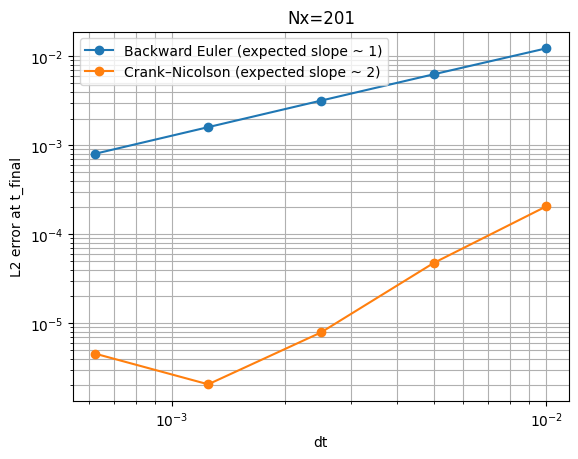

Estimated BE order ~ -0.985 (note: slope of log(err) vs log(dt) is p[0])
Estimated CN order ~ -1.555
Raw slopes: BE 0.985, CN 1.555


In [6]:
#nX=201
plt.figure()
plt.loglog(dt_arr, error_BE, 'o-', label='Backward Euler (expected slope ~ 1)')
plt.loglog(dt_arr, error_CN, 'o-', label='Crank–Nicolson (expected slope ~ 2)')
plt.title('Nx=201')
plt.xlabel('dt')
plt.ylabel('L2 error at t_final')
plt.grid(True, which='both')
plt.legend()
plt.show()

# estimate slopes by linear fit in log space
p_be = np.polyfit(np.log(dt_arr), np.log(error_BE), 1)
p_cn = np.polyfit(np.log(dt_arr), np.log(error_CN), 1)

print(f"Estimated BE order ~ {-p_be[0]:.3f} (note: slope of log(err) vs log(dt) is p[0])")
print(f"Estimated CN order ~ {-p_cn[0]:.3f}")
print(f"Raw slopes: BE {p_be[0]:.3f}, CN {p_cn[0]:.3f}")

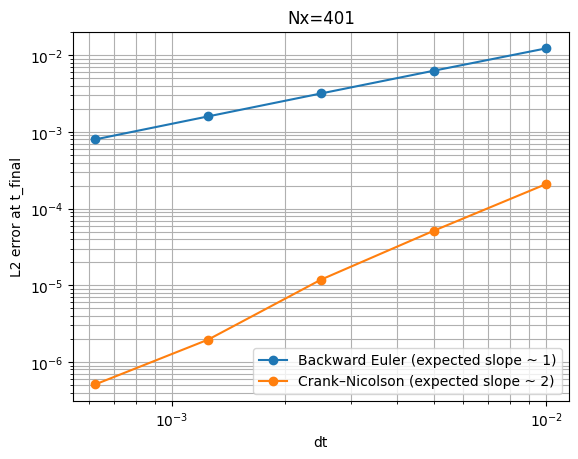

Estimated BE order ~ -0.986 (note: slope of log(err) vs log(dt) is p[0])
Estimated CN order ~ -2.207
Raw slopes: BE 0.986, CN 2.207


In [ ]:
#Nx=401
plt.figure()
plt.loglog(dt_arr, error_BE, 'o-', label='Backward Euler (expected slope ~ 1)')
plt.loglog(dt_arr, error_CN, 'o-', label='Crank–Nicolson (expected slope ~ 2)')
plt.title('Nx=401')
plt.xlabel('dt')
plt.ylabel('L2 error at t_final')
plt.grid(True, which='both')
plt.legend()
plt.show()

# estimate slopes by linear fit in log space
p_be = np.polyfit(np.log(dt_arr), np.log(error_BE), 1)
p_cn = np.polyfit(np.log(dt_arr), np.log(error_CN), 1)

print(f"Estimated BE order ~ {-p_be[0]:.3f} (note: slope of log(err) vs log(dt) is p[0])")
print(f"Estimated CN order ~ {-p_cn[0]:.3f}")
print(f"Raw slopes: BE {p_be[0]:.3f}, CN {p_cn[0]:.3f}")